In [1]:
import os

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
os.chdir('..')

In [4]:
path = os.path.join(os.getcwd(),'Datasets\\titanic.csv')
path

'D:\\Babin\\Internship\\Fusemachine-Internship\\Data Science\\Datasets\\titanic.csv'

# Standardization

Here, we try to bring all the variables or features  to a similar sclae. Here, all the features willl be transformed in such a way that it will have the properties of a standard normal distribution wiht mean = 0 and standard deviation = 1

<center>
    $$
    z=\frac{x - mean}{standard  deviation} \\
    $$
</center>

In [5]:
df = pd.read_csv(path, usecols=['Pclass','Age','Fare','Survived'])
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

In [7]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [8]:
df.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

In [9]:
df.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

<AxesSubplot:xlabel='Fare', ylabel='Density'>

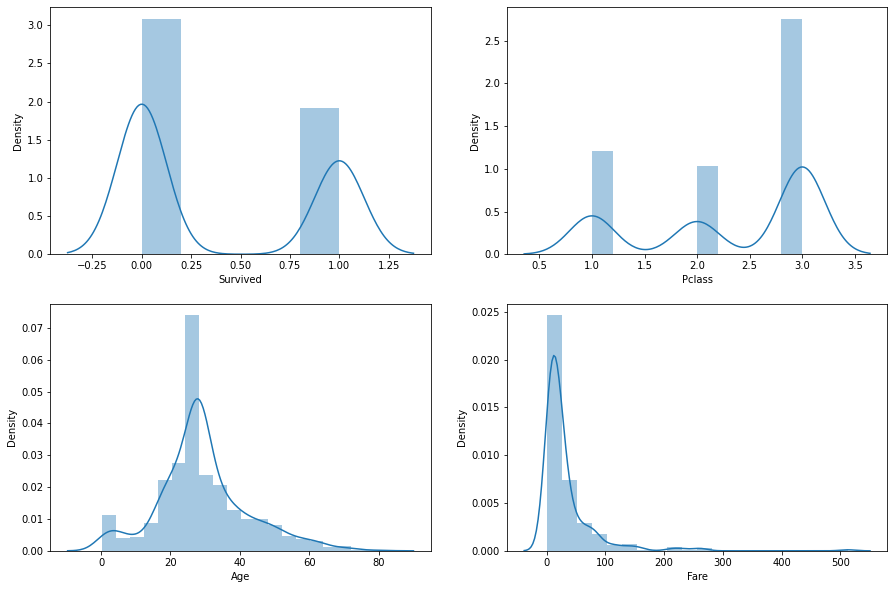

In [10]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
sns.distplot(df['Survived'],ax=ax[0][0])
sns.distplot(df['Pclass'],ax=ax[0][1])
sns.distplot(df['Age'],ax=ax[1][0],bins=20,kde=True)
sns.distplot(df['Fare'],ax=ax[1][1],bins=20,kde=True)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
df_scaled = scaler.fit_transform(df)

In [14]:
scaler.feature_names_in_

array(['Survived', 'Pclass', 'Age', 'Fare'], dtype=object)

In [15]:
df_scaled = pd.DataFrame(df_scaled, columns=scaler.feature_names_in_)

In [16]:
df_scaled.head()

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337


In [17]:
df_scaled.agg(['max','min','mean','median','std'])

,Survived,Pclass,Age,Fare
max,1.266990e+00,8.273772e-01,3.891554e+00,9.667167e+00
min,-7.892723e-01,-1.566107e+00,-2.224156e+00,-6.484217e-01
mean,3.987333e-17,-8.772133e-17,2.272780e-16,3.987333e-18
median,-7.892723e-01,8.273772e-01,-1.046374e-01,-3.573909e-01
std,1.000562e+00,1.000562e+00,1.000562e+00,1.000562e+00


C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

<AxesSubplot:xlabel='Fare', ylabel='Density'>

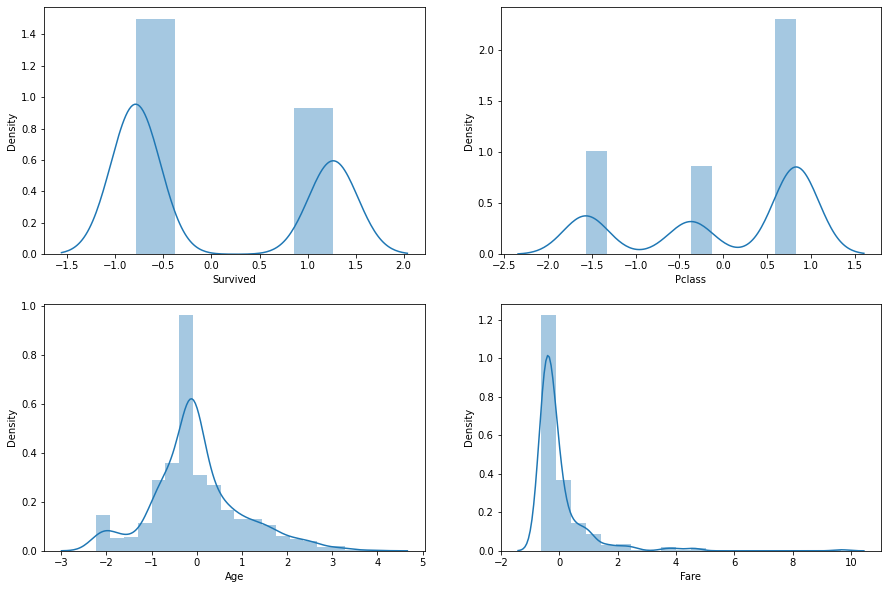

In [18]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
sns.distplot(df_scaled['Survived'],ax=ax[0][0])
sns.distplot(df_scaled['Pclass'],ax=ax[0][1])
sns.distplot(df_scaled['Age'],ax=ax[1][0],bins=20,kde=True)
sns.distplot(df_scaled['Fare'],ax=ax[1][1],bins=20,kde=True)

# Normalization/Min-max Scaling

In this approach we will scale down the values of the features between 0 to 1.<br/>

<p>
<center>
X<sub>norm</sub> = (X- X<sub>min</sub>)/(X<sub>max</sub>-X<sub>min</sub>)
</center>
</p>

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
min_max = MinMaxScaler()

In [21]:
df_minmax = pd.DataFrame(min_max.fit_transform(df), columns=df.columns)

In [22]:
df_minmax

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713
...,...,...,...,...
886,0.0,0.5,0.334004,0.025374
887,1.0,0.0,0.233476,0.058556
888,0.0,1.0,0.346569,0.045771
889,1.0,0.0,0.321438,0.058556


C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

<AxesSubplot:xlabel='Fare', ylabel='Density'>

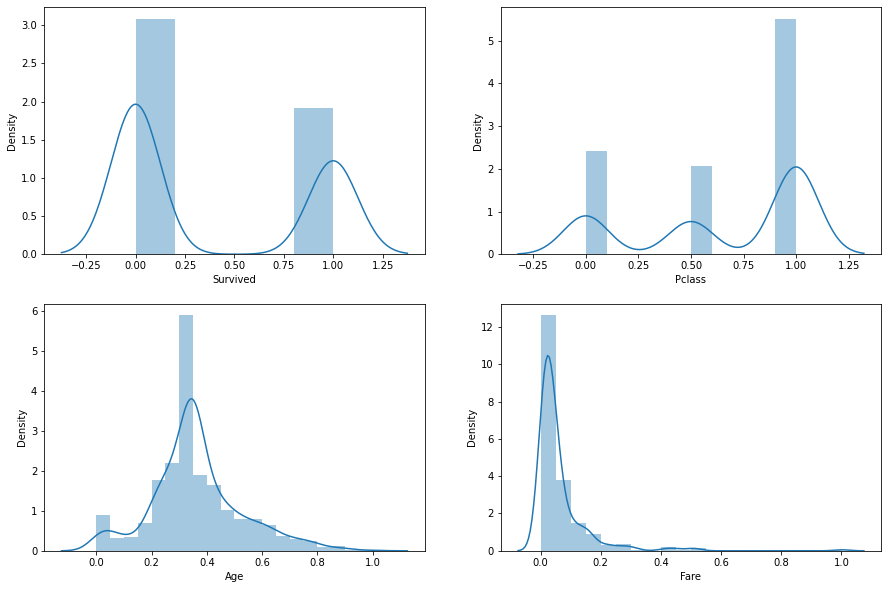

In [23]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
sns.distplot(df_minmax['Survived'],ax=ax[0][0])
sns.distplot(df_minmax['Pclass'],ax=ax[0][1])
sns.distplot(df_minmax['Age'],ax=ax[1][0],bins=20,kde=True)
sns.distplot(df_minmax['Fare'],ax=ax[1][1],bins=20,kde=True)

### Robust Scaler

It is used to scale the feature to median and quantiles. Scaling using median and quantiles consists of subtracting the median to all the observations, and then dividing by the interquartiel difference (Q3-Q1). The interquartiel difference is the difference between the 75th and 25th percentile:
<br/>
<b>IQR = 75th percentile - 25th percentile</b><br/>

<center>
    $$
    Xscaled=\frac{x - X.medain}{IQR} \\
    $$
</center>

In [24]:
from sklearn.preprocessing import RobustScaler

In [25]:
scaler = RobustScaler()

In [26]:
df_robust_scaler = pd.DataFrame(scaler.fit_transform(df), columns= scaler.get_feature_names_out())

In [27]:
df_robust_scaler

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363
...,...,...,...,...
886,0.0,-1.0,-0.076923,-0.062981
887,1.0,-2.0,-0.692308,0.673281
888,0.0,0.0,0.000000,0.389604
889,1.0,-2.0,-0.153846,0.673281


C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Predator\Envs\kn_ml\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` 

<AxesSubplot:xlabel='Fare', ylabel='Density'>

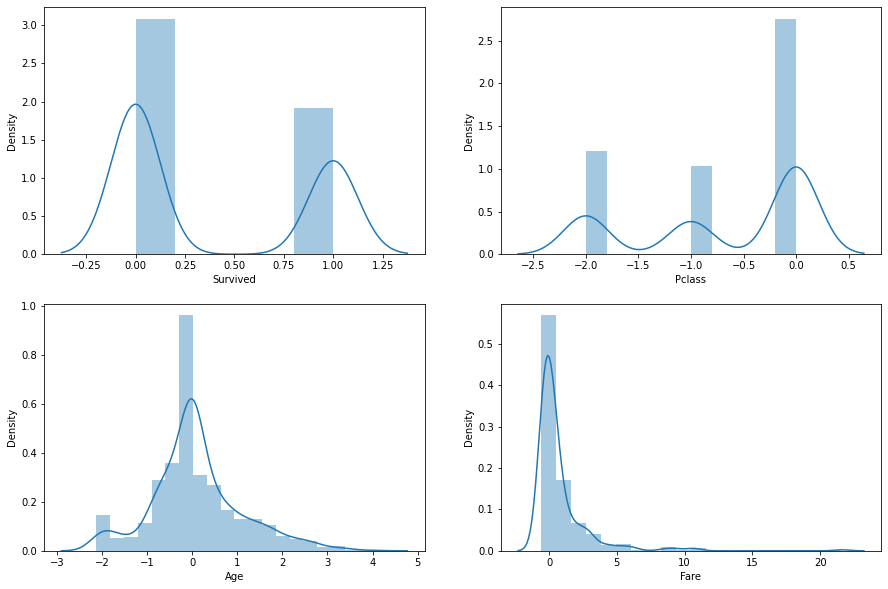

In [28]:
fig,ax = plt.subplots(2,2,figsize=(15,10))
sns.distplot(df_robust_scaler['Survived'],ax=ax[0][0])
sns.distplot(df_robust_scaler['Pclass'],ax=ax[0][1])
sns.distplot(df_robust_scaler['Age'],ax=ax[1][0],bins=20,kde=True)
sns.distplot(df_robust_scaler['Fare'],ax=ax[1][1],bins=20,kde=True)

# Gaussain Transformation

Whenever our distribution is not normally distributed, we can apply some mathematical equations to convert them to a Normal/Gaussian Distribution using various techniques like:
1. Logarithmic Transformation
2. Reciprocal Transformation
3. Square Root Transformation
4. Expornential Transformation
5. Boxcox Transformation
<br/>
Some machine learning algorithms work well with normally distributed data.

In [29]:
df = pd.read_csv(path, usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [30]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [31]:
df['Age'].median()

28.0

In [32]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [33]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

<AxesSubplot:>

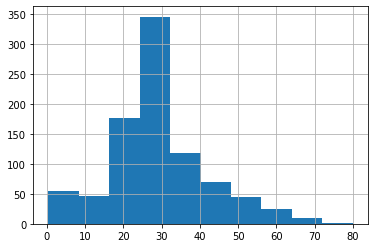

In [34]:
df['Age'].hist()

In [35]:
import scipy.stats as stat
import pylab

In [36]:
#### If you want to check whether the feature is gaussian or 
####normally distributed we use Quantile-Quantile(Q-Q) plot
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

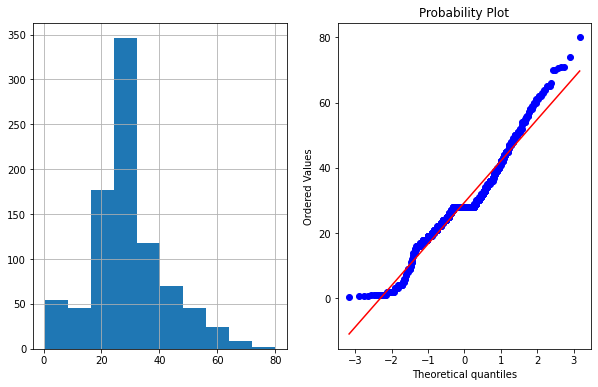

In [37]:
plot_data(df,'Age')

#### Logarithmic Transformation

In [38]:
df['Age_log'] = np.log(df['Age'])
df

,Survived,Age,Fare,Age_log
0,0,22.0,7.2500,3.091042
1,1,38.0,71.2833,3.637586
2,1,26.0,7.9250,3.258097
3,1,35.0,53.1000,3.555348
4,0,35.0,8.0500,3.555348
...,...,...,...,...
886,0,27.0,13.0000,3.295837
887,1,19.0,30.0000,2.944439
888,0,28.0,23.4500,3.332205
889,1,26.0,30.0000,3.258097


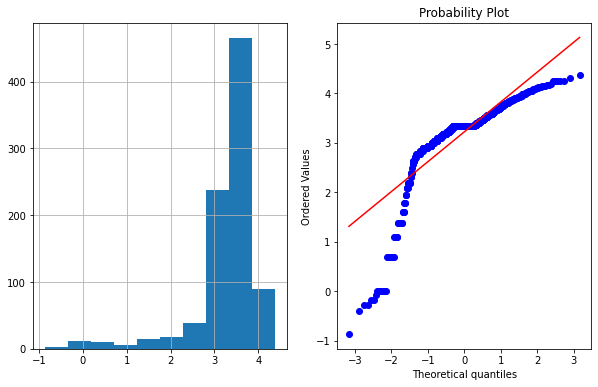

In [39]:
plot_data(df,'Age_log')

#### Reciprocal Transformation

In [40]:
df['Age_reciprocal'] = 1/df['Age']

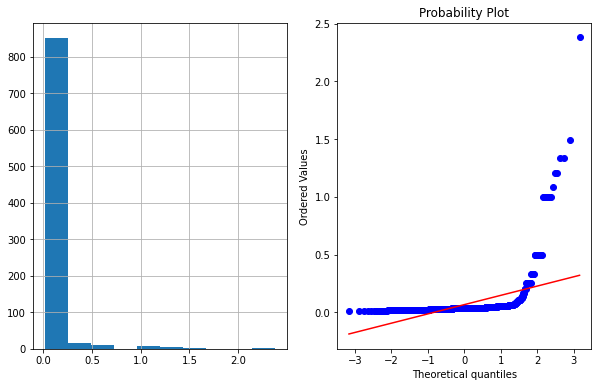

In [41]:
plot_data(df,'Age_reciprocal')

#### Square Root Transformation

In [42]:
df['Age_squareroot'] =(df['Age'])**(1/2)

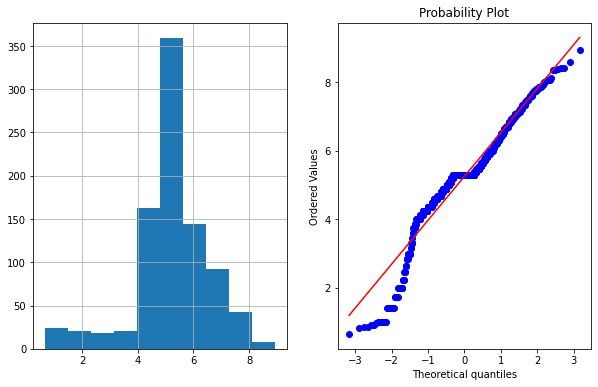

In [43]:
plot_data(df,'Age_squareroot')

#### Exponential Transformation


In [44]:
np.exp(df['Age'])

0      3.584913e+09
1      3.185593e+16
2      1.957296e+11
3      1.586013e+15
4      1.586013e+15
           ...     
886    5.320482e+11
887    1.784823e+08
888    1.446257e+12
889    1.957296e+11
890    7.896296e+13
Name: Age, Length: 891, dtype: float64

In [45]:
df['Age_exponential'] = df['Age']**(1/1.2)

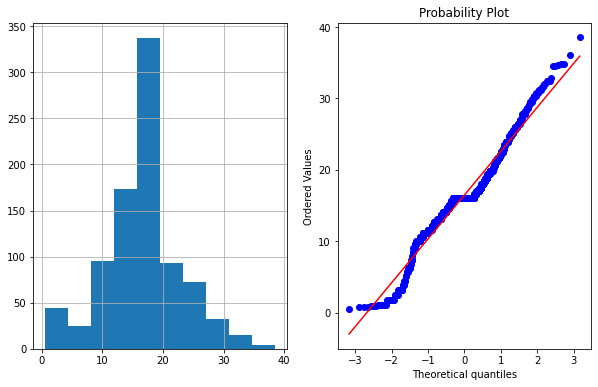

In [46]:
plot_data(df,'Age_exponential')

### BoxCox Transformation

The Box-Cox Transformation is defined as: <br/>
<b> T(Y) = (Y exp(lambda)-1)/lambda</b>
where Y is the response variable and lambda is the transformation parameter. lambda varies from -5 to 5. In the transformation, all values of lambda are considered and the optimal value for a given variable is selecte.d

In [47]:
df['Age_Boxcox'],parameters = stat.boxcox(df['Age'])

In [48]:
print(parameters)

0.7964531473656952


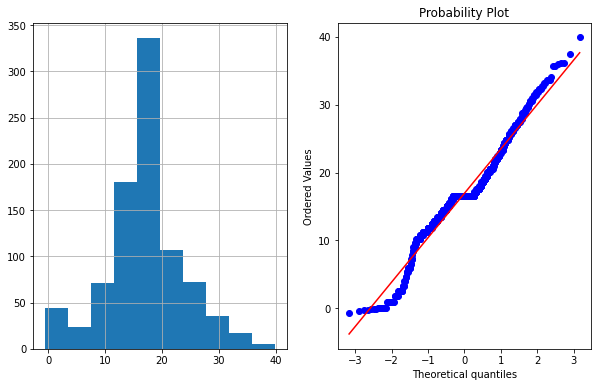

In [49]:
plot_data(df, 'Age_Boxcox')